In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '0', '0', '1', '0', '0', '1', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ A □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_maze_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=200)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 2000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)

df_other = XNCSExp(maze=maze,
             cfg=XNCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.07538530000000021, 'population': 143, 'numerosity': 194, 'average_specificity': 6.365979381443299}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 11, 'reward': 1023.1122292121702, 'perf_time': 0.16061479999999762, 'population': 750, 'numerosity': 7000, 'average_specificity': 6.187285714285714}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 58, 'reward': 1000.0000023605279, 'perf_time': 0.5935101000000031, 'population': 659, 'numerosity': 7000, 'average_specificity': 5.825714285714286}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 100, 'reward': 2.0138287098883283e-27, 'perf_time': 0.833867199999986, 'population': 688, 'numerosity': 7000, 'average_specificity': 5.380285714285714}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 5, 'reward': 1180.491368195589, 'perf_time': 0.10066210000002229, 'population': 785, 'numerosity': 7000, 'average_specificity': 7.065571428571428}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 48, 'reward': 1000.0001268279443, 'perf_time': 0.42150780000002896, 'population': 687, 'numerosity': 7000, 'average_specificity'

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 47, 'reward': 1000.0001069623554, 'perf_time': 0.7074784999999792, 'numerosity': 7000, 'population': 1396, 'average_specificity': 10.090142857142856, 'fraction_accuracy': 1.0, 'knowledge': 0.684931506849315}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 100, 'reward': 1.8127951019029646e-146, 'perf_time': 2.2152730000000247, 'numerosity': 7000, 'population': 2040, 'average_specificity': 8.935857142857143, 'fraction_accuracy': 1.0, 'knowledge': 1.36986301369863}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 100, 'reward': 1.7851295693464663e-27, 'perf_time': 2.84085170000003, 'numerosity': 7000, 'population': 2711, 'average_specificity': 13.068428571428571, 'fraction_accuracy': 1.0, 'knowledge': 0.0}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 54, 'reward': 1000.0000092886122, 'perf_time': 1.8440792000001238, 'numerosity': 7000, 'population': 2892, 'average_specificity': 14.202428571428571, 'fraction_acc

In [5]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other
trial,,,,,,,,,,,
0,100,0.000000e+00,0.075385,143,194,6.365979,100,124,173,6.693642,1.00
100,8,1.101298e+03,0.052353,757,7000,9.154143,1,1017,5944,11.546265,1.00
200,11,1.023112e+03,0.160615,750,7000,6.187286,47,1396,7000,10.090143,1.00
300,9,1.046040e+03,0.070715,687,7000,6.249857,24,1629,7000,9.047286,1.00
400,58,1.000000e+03,0.593510,659,7000,5.825714,100,2040,7000,8.935857,1.00
500,24,1.000269e+03,0.115538,669,7000,5.720000,3,2557,7000,11.392857,1.00
600,100,2.013829e-27,0.833867,688,7000,5.380286,100,2711,7000,13.068429,1.00
700,19,1.001492e+03,0.101426,726,7000,7.827571,4,2874,7000,15.086857,1.00
800,5,1.180491e+03,0.100662,785,7000,7.065571,54,2892,7000,14.202429,0.96


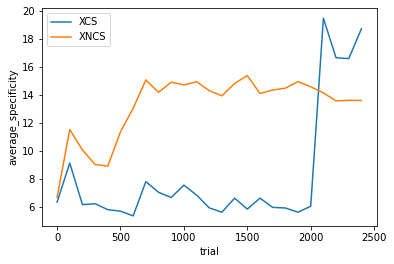

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])



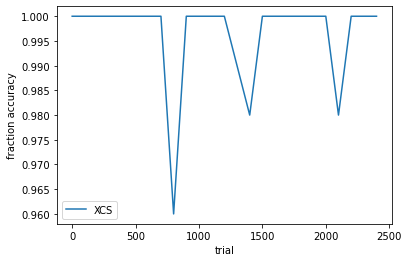

In [8]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

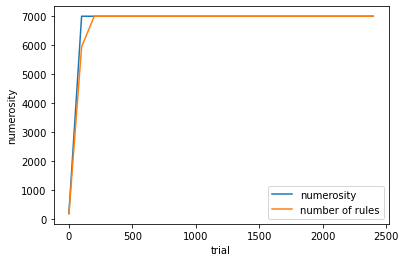

In [9]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

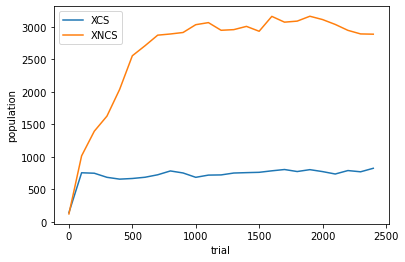

In [10]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

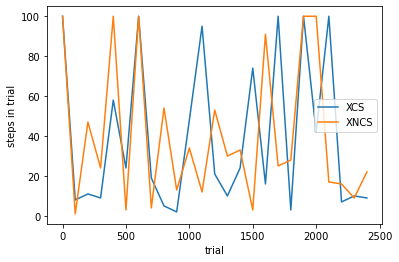

In [11]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])